# GETTING STARTED
This is interactive code, which runs sequentially in cells. 
You can run each cell independently or run everything all at once.

You cannot run a cell without running the cells above it or it will have errors.

To run everything at once:
- Go to the 'Run' menu at the top. Sometimes this menu is called 'Cells'
- Tap 'Run All Cells'/'Run All'.
- Click the links below to see the fancy plots. They are interactive.


### Links

*These links will not work until you 'Run All Cells' as instructed above*

- [Plot Confirmed Cases by Province/State](#plot_confirmed)
- [Plot Growth by Province/State](#plot_growth)
- [Plot Acceleration by Province/State](#plot_acceleration)

In [9]:
# MODIFY THIS TO GET YOUR TARGET COUNTRY

# COUNTRIES INCLUDE

# ['Thailand' 'Japan' 'Singapore' 'Nepal' 'Malaysia' 'Canada' 'Australia'
#  'Cambodia' 'Sri Lanka' 'Germany' 'Finland' 'United Arab Emirates'
#  'Philippines' 'India' 'Italy' 'Sweden' 'Spain' 'Belgium' 'Egypt'
#  'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait' 'Algeria'
#  'Croatia' 'Switzerland' 'Austria' 'Israel' 'Pakistan' 'Brazil' 'Georgia'
#  'Greece' 'North Macedonia' 'Norway' 'Romania' 'Estonia' 'San Marino'
#  'Belarus' 'Iceland' 'Lithuania' 'Mexico' 'New Zealand' 'Nigeria'
#  'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan' 'Armenia'
#  'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco'
#  'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Hungary'
#  'Liechtenstein' 'Poland' 'Tunisia' 'Bosnia and Herzegovina' 'Slovenia'
#  'South Africa' 'Bhutan' 'Cameroon' 'Colombia' 'Costa Rica' 'Peru'
#  'Serbia' 'Slovakia' 'Togo' 'Malta' 'Martinique' 'Bulgaria' 'Maldives'
#  'Bangladesh' 'Paraguay' 'Albania' 'Cyprus' 'Brunei' 'US' 'Burkina Faso'
#  'Holy See' 'Mongolia' 'Panama' 'China' 'Iran' 'Korea, South' 'France'
#  'Cruise Ship' 'Denmark' 'Czechia' 'Taiwan*' 'Vietnam' 'Russia' 'Moldova'
#  'Bolivia' 'Honduras' 'United Kingdom' 'Congo (Kinshasa)' "Cote d'Ivoire"
#  'Jamaica' 'Turkey' 'Cuba' 'Guyana' 'Kazakhstan' 'Ethiopia' 'Sudan'
#  'Guinea' 'Aruba' 'Kenya' 'Antigua and Barbuda' 'Uruguay' 'Ghana' 'Jersey'
#  'Namibia' 'Seychelles' 'Trinidad and Tobago' 'Venezuela' 'Eswatini'
#  'Gabon' 'Guatemala' 'Guernsey' 'Mauritania' 'Rwanda' 'Saint Lucia'
#  'Saint Vincent and the Grenadines' 'Suriname' 'Kosovo'
#  'Central African Republic' 'Congo (Brazzaville)' 'Equatorial Guinea'
#  'Uzbekistan' 'Netherlands' 'Benin' 'Greenland' 'Liberia'
#  'Republic of the Congo' 'Somalia' 'Tanzania' 'The Bahamas' 'Barbados'
#  'Montenegro' 'The Gambia']

TARGET_COUNTRY = "Canada"

## Download dataset 

Dataset is at https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/

In [1]:
import pandas as pd
import requests
import io

confirmedUrl = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
deathsUrl = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

r = requests.post(confirmedUrl)
if r.ok:
    data = r.content.decode('utf8')
    df = pd.read_csv(io.StringIO(data))
    
# Rename Province/State and Country/Region
df = df.rename(columns={'Province/State': 'provincestate', 'Country/Region': 'countryregion'})

# Remove unneeded columns
# df = df.drop(['Lat', 'Long', 'provincestate'], axis=1)

df.head()

provincestate countryregion      Lat      Long  1/22/20  1/23/20  1/24/20  \
0           NaN      Thailand  15.0000  101.0000        2        3        5   
1           NaN         Japan  36.0000  138.0000        2        1        2   
2           NaN     Singapore   1.2833  103.8333        0        1        3   
3           NaN         Nepal  28.1667   84.2500        0        0        0   
4           NaN      Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  \
0        7        8        8  ...      50      50       53       59       70   
1        2        4        4  ...     502     511      581      639      639   
2        3        4        5  ...     150     150      160      178      178   
3        1        1        1  ...       1       1        1        1        1   
4        3        4        4  ...      99     117      129      149      149   

   3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  
0       75       82      114      147      177  
1      701      773      839      825      878  
2      200      212      226      243      266  
3        1        1        1        1        1  
4      197      238      428      566      673  

[5 rows x 60 columns]

In [12]:
# Remove unneeded columns
# df = df.drop(['Lat', 'Long', 'provincestate'], axis=1)

# Reshape 
df_confirmed = df.melt(var_name='date', value_name='confirmed', id_vars=['countryregion', 'provincestate', 'Lat', 'Long'])

df_confirmed.head()

# countries = df_confirmed['countryregion'].unique()
# print(countries)

['Thailand' 'Japan' 'Singapore' 'Nepal' 'Malaysia' 'Canada' 'Australia'
 'Cambodia' 'Sri Lanka' 'Germany' 'Finland' 'United Arab Emirates'
 'Philippines' 'India' 'Italy' 'Sweden' 'Spain' 'Belgium' 'Egypt'
 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait' 'Algeria'
 'Croatia' 'Switzerland' 'Austria' 'Israel' 'Pakistan' 'Brazil' 'Georgia'
 'Greece' 'North Macedonia' 'Norway' 'Romania' 'Estonia' 'San Marino'
 'Belarus' 'Iceland' 'Lithuania' 'Mexico' 'New Zealand' 'Nigeria'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan' 'Armenia'
 'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco'
 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Hungary'
 'Liechtenstein' 'Poland' 'Tunisia' 'Bosnia and Herzegovina' 'Slovenia'
 'South Africa' 'Bhutan' 'Cameroon' 'Colombia' 'Costa Rica' 'Peru'
 'Serbia' 'Slovakia' 'Togo' 'Malta' 'Martinique' 'Bulgaria' 'Maldives'
 'Bangladesh' 'Paraguay' 'Albania' 'Cyprus' 'Brunei' 'US' 'Burkina Faso'
 'Holy See'

In [3]:
# Restrict to target country
df_confirmed_grouped = df_confirmed.query('countryregion == "{}"'.format(TARGET_COUNTRY)).copy()

df_confirmed_grouped.head(20)

countryregion              provincestate      Lat      Long     date  \
5          Canada           British Columbia  49.2827 -123.1207  1/22/20   
92         Canada                    Ontario  51.2538  -85.3232  1/22/20   
93         Canada                    Alberta  53.9333 -116.5765  1/22/20   
94         Canada                     Quebec  52.9399  -73.5491  1/22/20   
201        Canada              New Brunswick  46.5653  -66.4619  1/22/20   
406        Canada                   Manitoba  53.7609  -98.8139  1/22/20   
407        Canada               Saskatchewan  52.9399 -106.4509  1/22/20   
412        Canada             Grand Princess  37.6489 -122.6655  1/22/20   
436        Canada  Newfoundland and Labrador  53.1355  -57.6604  1/22/20   
437        Canada       Prince Edward Island  46.5107  -63.4168  1/22/20   
444        Canada                Nova Scotia  44.6820  -63.7443  1/22/20   
465        Canada           British Columbia  49.2827 -123.1207  1/23/20   
552        Canada                    Ontario  51.2538  -85.3232  1/23/20   
553        Canada                    Alberta  53.9333 -116.5765  1/23/20   
554        Canada                     Quebec  52.9399  -73.5491  1/23/20   
661        Canada              New Brunswick  46.5653  -66.4619  1/23/20   
866        Canada                   Manitoba  53.7609  -98.8139  1/23/20   
867        Canada               Saskatchewan  52.9399 -106.4509  1/23/20   
872        Canada             Grand Princess  37.6489 -122.6655  1/23/20   
896        Canada  Newfoundland and Labrador  53.1355  -57.6604  1/23/20   

     confirmed  
5            0  
92           0  
93           0  
94           0  
201          0  
406          0  
407          0  
412          0  
436          0  
437          0  
444          0  
465          0  
552          0  
553          0  
554          0  
661          0  
866          0  
867          0  
872          0  
896          0

## Calculate metrics

In [4]:
# Calculate change
window = 5
growthCalculation = lambda x: (x.max())

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

x = pd.Series(range(0,window)).values.reshape(-1,1)
linearCoefficient = lambda values: (linear_regressor.fit(x, values.values.reshape(-1,1)).coef_)

df_confirmed_grouped['growth_rate'] = df_confirmed_grouped.groupby(['provincestate'])['confirmed'].rolling(window).apply(linearCoefficient).fillna(0).reset_index(level=0, drop=True)
df_confirmed_grouped['acceleration_rate'] = df_confirmed_grouped['growth_rate'].rolling(window).apply(linearCoefficient).fillna(0)

df_confirmed_grouped.head(10)

countryregion              provincestate      Lat      Long     date  \
5          Canada           British Columbia  49.2827 -123.1207  1/22/20   
92         Canada                    Ontario  51.2538  -85.3232  1/22/20   
93         Canada                    Alberta  53.9333 -116.5765  1/22/20   
94         Canada                     Quebec  52.9399  -73.5491  1/22/20   
201        Canada              New Brunswick  46.5653  -66.4619  1/22/20   
406        Canada                   Manitoba  53.7609  -98.8139  1/22/20   
407        Canada               Saskatchewan  52.9399 -106.4509  1/22/20   
412        Canada             Grand Princess  37.6489 -122.6655  1/22/20   
436        Canada  Newfoundland and Labrador  53.1355  -57.6604  1/22/20   
437        Canada       Prince Edward Island  46.5107  -63.4168  1/22/20   

     confirmed  growth_rate  acceleration_rate  
5            0          0.0                0.0  
92           0          0.0                0.0  
93           0          0.0                0.0  
94           0          0.0                0.0  
201          0          0.0                0.0  
406          0          0.0                0.0  
407          0          0.0                0.0  
412          0          0.0                0.0  
436          0          0.0                0.0  
437          0          0.0                0.0

## Plot
### Prepare chart

In [5]:
# Show fig
import plotly.express as px
import plotly.graph_objects as go

colorSequence = ["red", "royalblue"]

layout = go.Layout(title="COVID-19 confirmed cases by province/state", margin={"l": 100, "r": 100},
                   colorway=["#287D95", "#EF533B"], legend={"x": 0.7, "y": 1, 'orientation': "h"},
                   yaxis={'title': 'Confirmed cases'},                   
                   xaxis={"title": "Date",
                         'domain': [0, 0.92]},
                   height=1000)

chinaColor = colorSequence[0]

# Only plot 'confirmed', since we can't control the dashed lines and second-axes using Plotly Express
trace_confirmed = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='confirmed', 
                           color='provincestate',).data

# Add growth rate
trace_growth = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='growth_rate', 
                           color='provincestate',).data

# Add acceleration rate
trace_accel = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='acceleration_rate', 
                           color='provincestate',).data

<a id='plot_confirmed'></a>
### Plot Confirmed Cases by Province/State

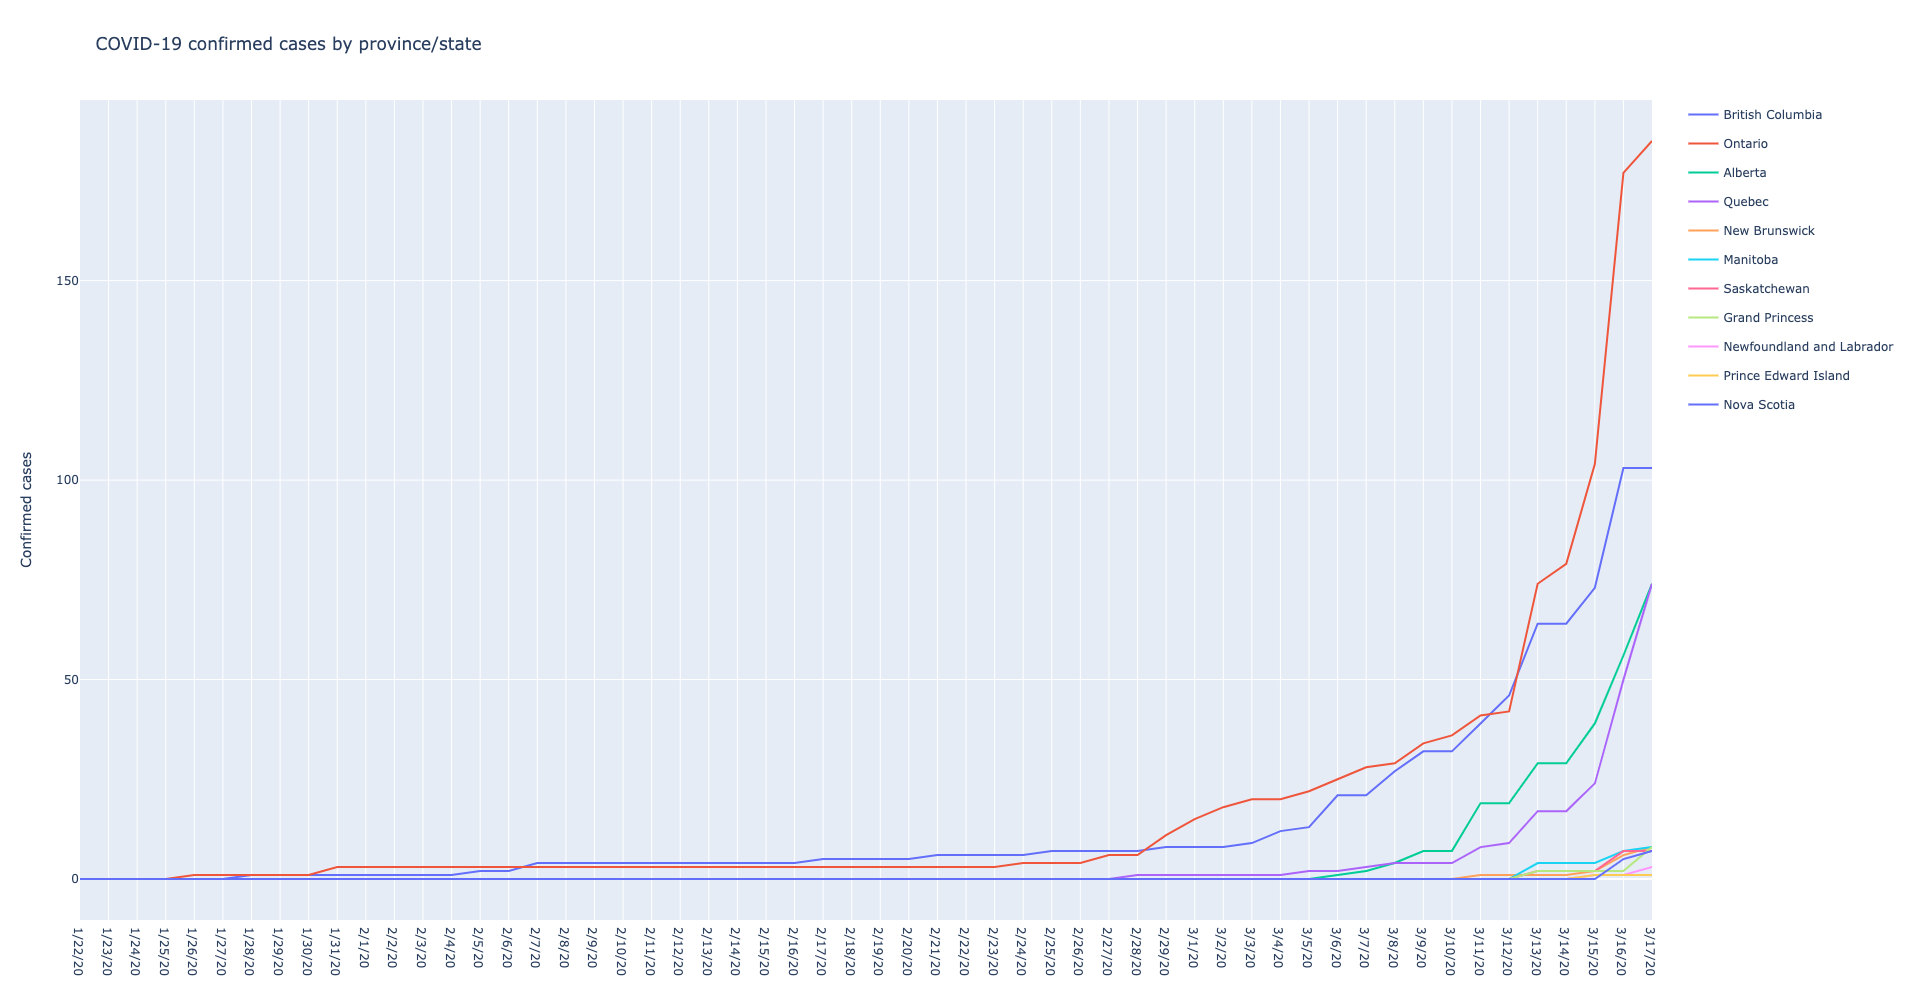

In [6]:
layout = go.Layout(title="COVID-19 confirmed cases by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_confirmed, layout=layout)
fig.show()

<a id='plot_growth'></a>
### Plot Growth Rate by Province/State

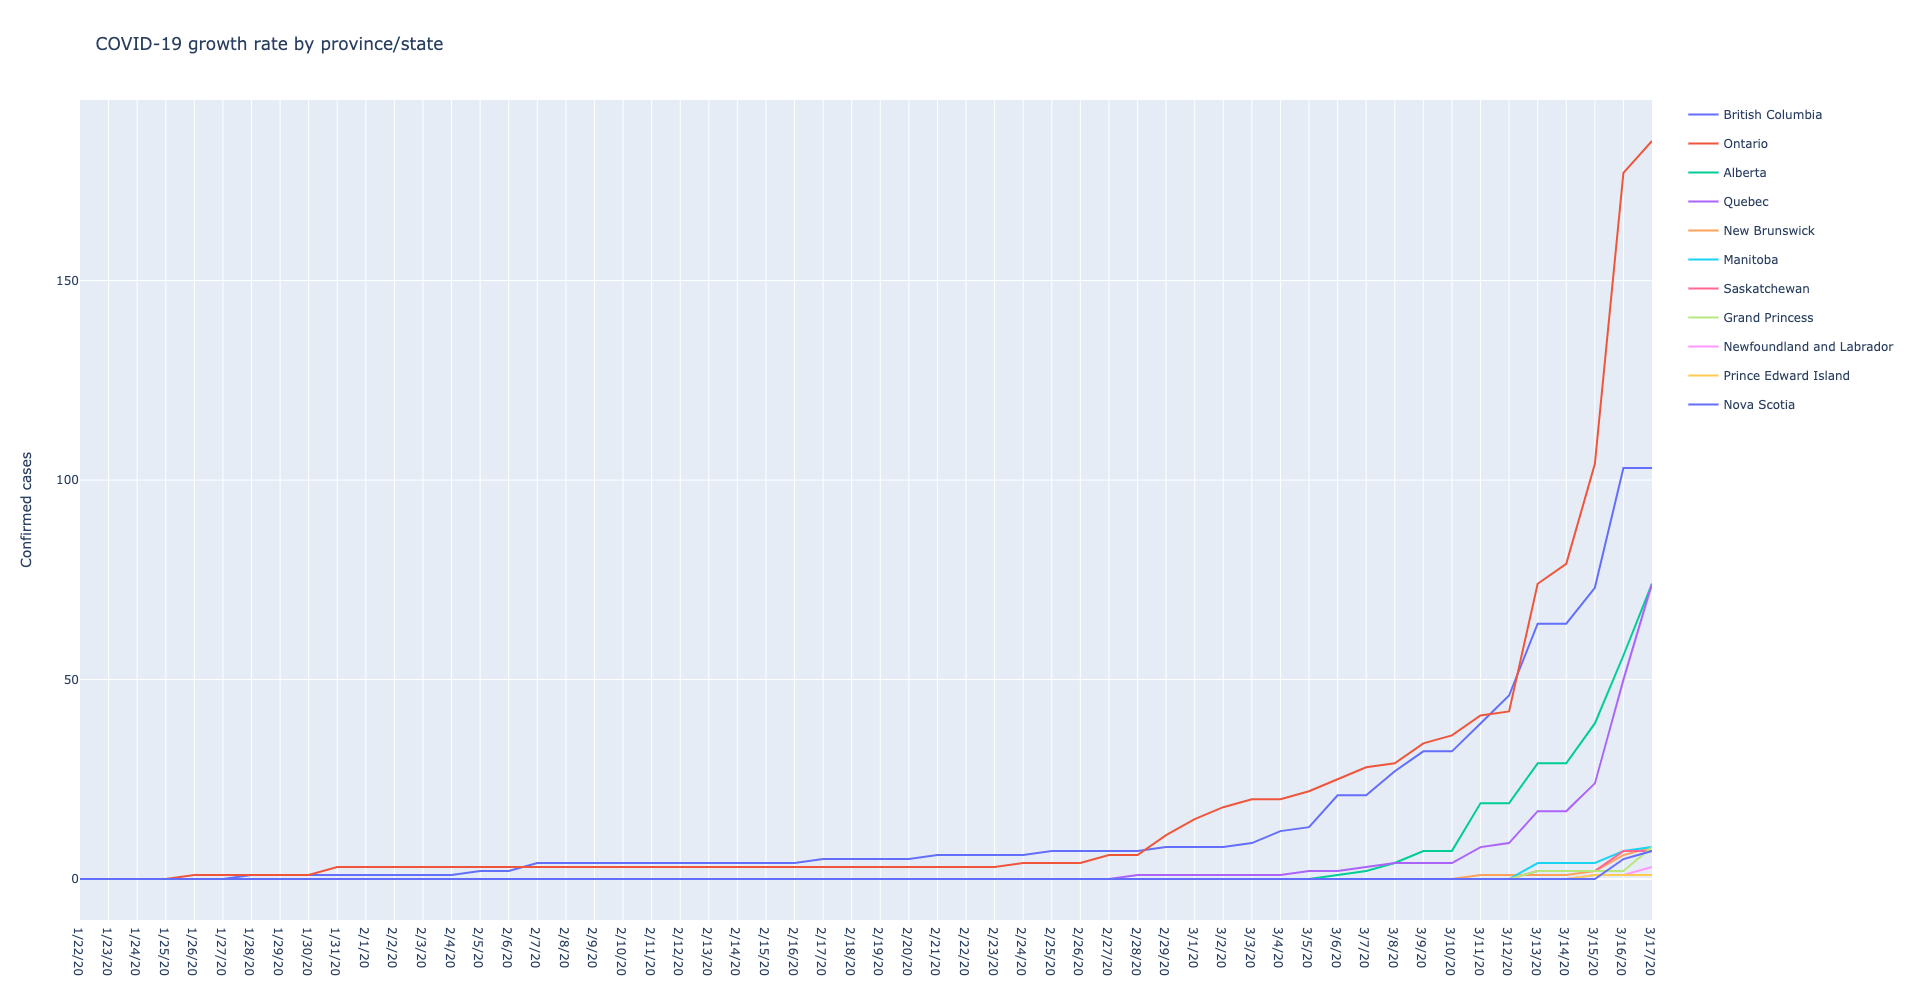

In [7]:
layout = go.Layout(title="COVID-19 growth rate by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_confirmed, layout=layout)
fig.show()

<a id='plot_acceleration'></a>
### Plot Acceleration Rate by Province/State

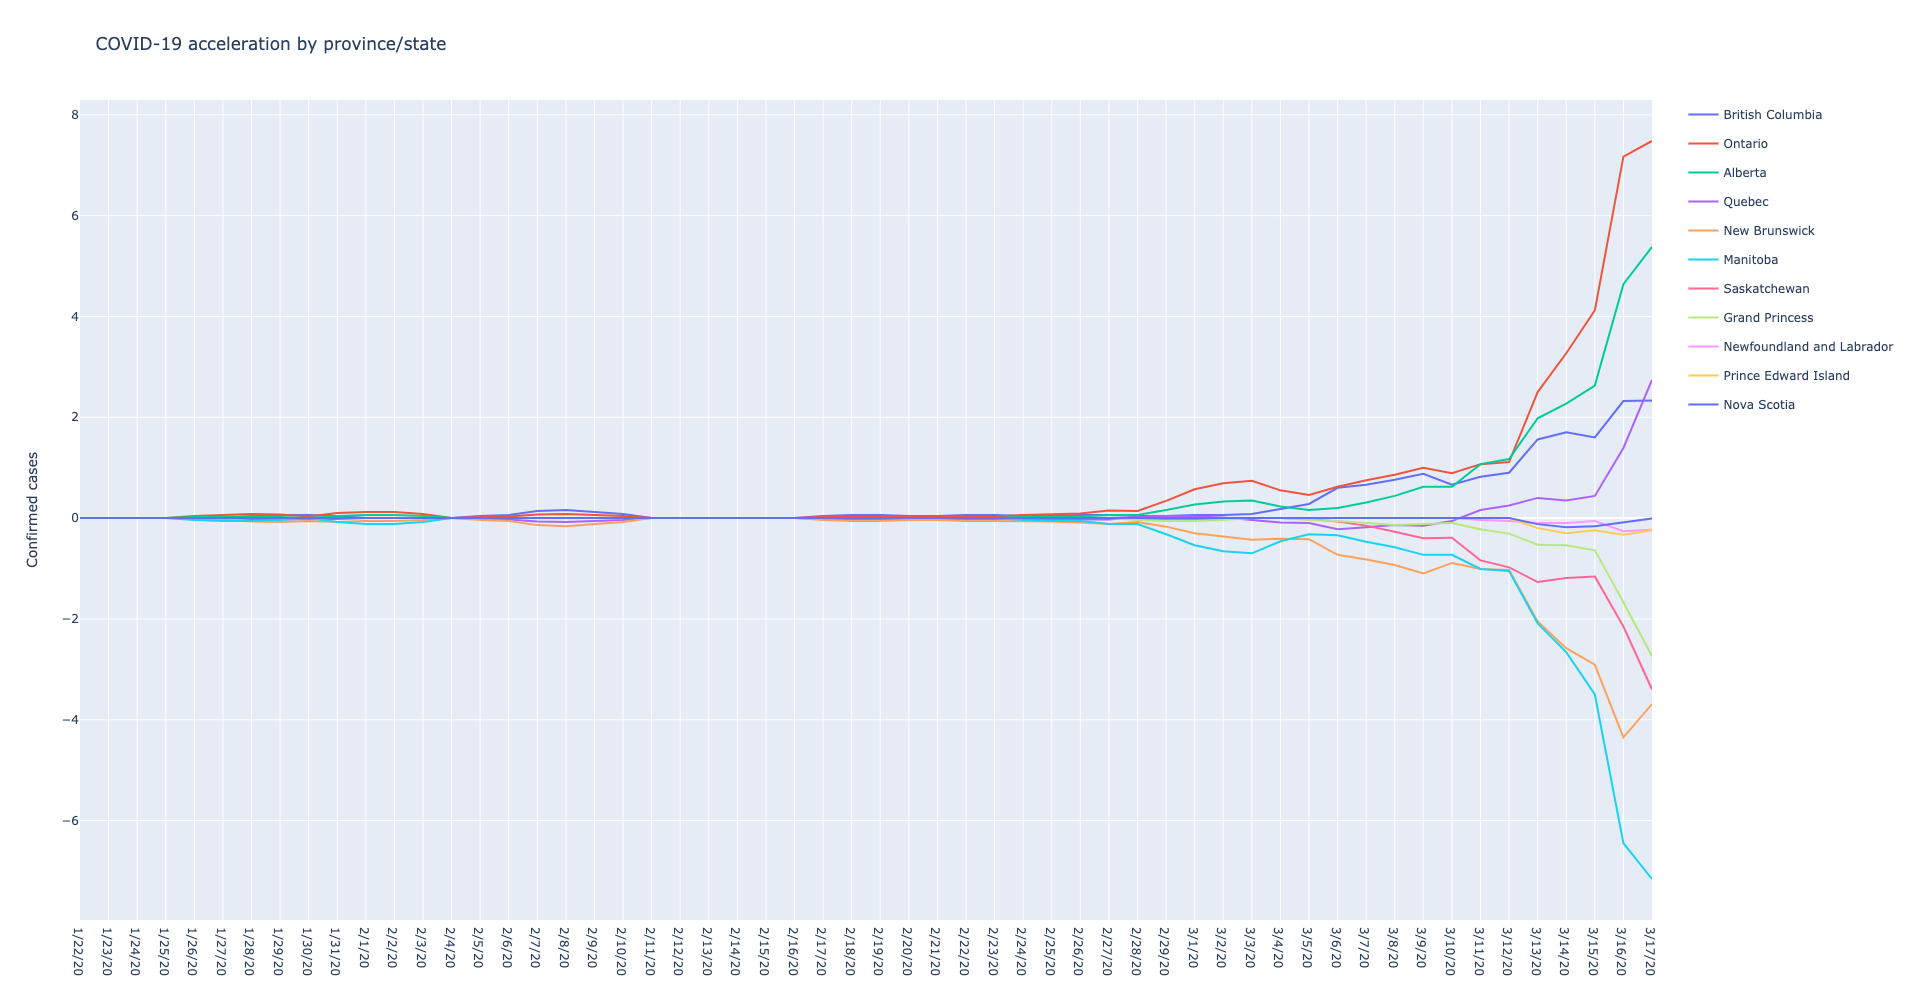

In [8]:
layout = go.Layout(title="COVID-19 acceleration by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_accel, layout=layout)
fig.show()